# Google Trends API for Python

## In this tutorial, I will demonstrate how to use the Google Trends API for getting the current trending topics on the internet.


![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. Google Trends is Google's website (obviously). With the help of this tutorial, you can get the trending results and many more from google trends website using python. You don't need to manually search and copy the trending results, the Python API called `pytrends` does the job for you. Before getting started, I want all of you guys to go through the official documentation of the `pytrends` API.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. 

> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [1]:
!pip install pytrends

# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [2]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()



---



## Interest By Region

Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as "Taylor Swift" (I like her so….).

In [4]:
pytrend.build_payload(kw_list=['Taylor Swift'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


**Now you might be thinking what are the values, what do they denote?**

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

<AxesSubplot:xlabel='geoName'>

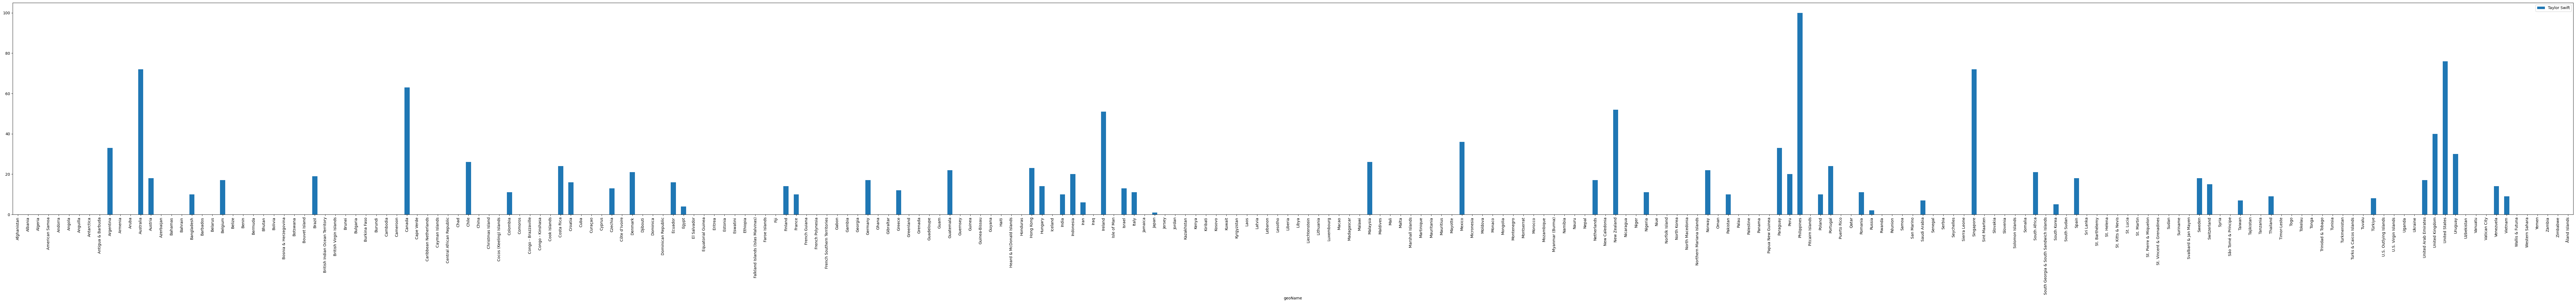

In [5]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [6]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Real Madrid vs Man City
1,Man City
2,2025 4Runner
3,Celtics
4,Joker 2


Make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [7]:
df = pytrend.today_searches(pn='US')



---



## Top Charts

Let us see what was trending in 2019. With the help of `top_charts` method we can get the top trending searches yearly.

In [9]:
# Get Google Top Charts
df = pytrend.top_charts(2023, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,War in Israel and Gaza,Israel Gaza
1,Titanic submarine,
2,Turkey earthquake,
3,Hurricane Hilary,
4,Hurricane Idalia,


To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2019/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [10]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Car make
1,Mercedes-Benz C-Class,Luxury car
2,Mercedes-Benz Sprinter,Van
3,Mercedes-Benz CLS,Luxury car
4,Mercedes-Benz Vito,Multi-utility vehicle




---



## Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic "***Coronavirus***". Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [11]:
pytrend.build_payload(kw_list=['Coronavirus'])

Now let's run the method `related_queries` which returns a dictionary full of related queries for the topic ***Coronavirus***

In [13]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     84
2                news coronavirus     63
3                          corona     57
4               coronavirus india     48
5            coronavirus symptoms     37
6              france coronavirus     34
7         coronavirus worldometer     32
8                     worldometer     32
9   thank you coronavirus helpers     31
10                usa coronavirus     30
11                 us coronavirus     30
12              world coronavirus     30
13                 coronavirus us     29
14               coronavirus tips     28
15                coronavirus map     28
16               coronavirus live     25
17             coronavirus deaths     25
18                   corona virus     23
19                       covid 19     21
20              coronavirus death     20
21            coronavirus vaccine     19
22           coronavirus in india   

Similarly, you can also search for the related topics just run the below code to do so:

In [14]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                            link  \
0  211550       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1   78950       Breakout  /trends/explore?q=/g/11j8mrgv83&date=today+5-y   
2   58900       Breakout  /trends/explore?q=/g/11hf8022b_&date=today+5-y   
3   48000       Breakout  /trends/explore?q=/g/11j83yvzwz&date=today+5-y   
4   42900       Breakout       /trends/explore?q=/m/09kvv&date=today+5-y   
5   39550       Breakout      /trends/explore?q=/m/07l88z&date=today+5-y   
6   35850       Breakout  /trends/explore?q=/g/11j8rhhg_s&date=today+5-y   
7    4200        +4,200%       /trends/explore?q=/m/03rjj&date=today+5-y   
8    1750        +1,750%       /trends/explore?q=/m/0d0xs&date=today+5-y   
9      40           +40%  /trends/explore?q=/g/11j8_9sv06&date=today+5-y   

       topic_mid                                      topic_title  \
0  /g/11ckxx4f1g                                     Worldometers   
1



---



This is the end of the tutorial, I hope you guys have learned a thing or two. If you guys have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Alright see you in my next tutorial, have a good day!!!